<a name='top'></a>
Javier Lopez<br>
Student ID: 000697446
# Test NYC Rideshare, Weather, Covid, and Vaccination Data
## Feb 2019-Mar 2022
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)
plt.rcParams['figure.figsize'] = (18,10)
plt.style.use('seaborn-whitegrid')

## Load Data
***

In [2]:
root = 'data/clean_data/'
uber = pd.read_parquet(root + 'uber_borough_tripdata.parquet')
lyft = pd.read_parquet(root + 'lyft_borough_tripdata.parquet')
weather = pd.read_parquet(root + 'weather_data_clean.parquet')
covid = pd.read_parquet(root + 'covid_data_clean.parquet')
vax = pd.read_parquet(root + 'vaccination_data_clean.parquet')

## Test Data for Seasonality and Trend
***

In [3]:
def test_stationarity(series):
    #Plot rolling statistics
    plt.subplot(311)
    plt.plot(series,label='Original')
    plt.plot(series.rolling(7).mean(), label='Rolling Mean')
    plt.plot(series.rolling(7).std(), label = 'Rolling Std')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()

    print('Null Hypothesis: Data is not stationary', end='\n\n')

    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    series_test = adfuller(series, autolag='AIC')
    series_output = pd.Series(series_test[:4], index=['ADF Statistic','p-value','Lags Used','Observations Used'])

    for key, value in series_test[4].items():
        series_output['Confidence Interval (%s)'%key] = value

    print(series_output, end='\n\n')

    if series_test[1] <= 0.05:
        print('Reject null hypothesis - data is stationary')
    else:
        print('Accept null hypothesis - data is not stationary')

In [4]:
def plot_acf_pacf(series):
    fig, ax = plt.subplots(2,1)
    plot_acf(series, ax=ax[0])
    plot_pacf(series, ax=ax[1])
    plt.tight_layout()

In [5]:
def get_decomp(series):
    seasonal_decompose(series).plot()
    plt.show()

### Uber
***

#### Test Stationarity
***

Null Hypothesis: Data is not stationary

Results of Dickey-Fuller Test:
ADF Statistic                  -2.232823
p-value                         0.194549
Lags Used                      21.000000
Observations Used            1133.000000
Confidence Interval (1%)       -3.436135
Confidence Interval (5%)       -2.864094
Confidence Interval (10%)      -2.568130
dtype: float64

Accept null hypothesis - data is not stationary


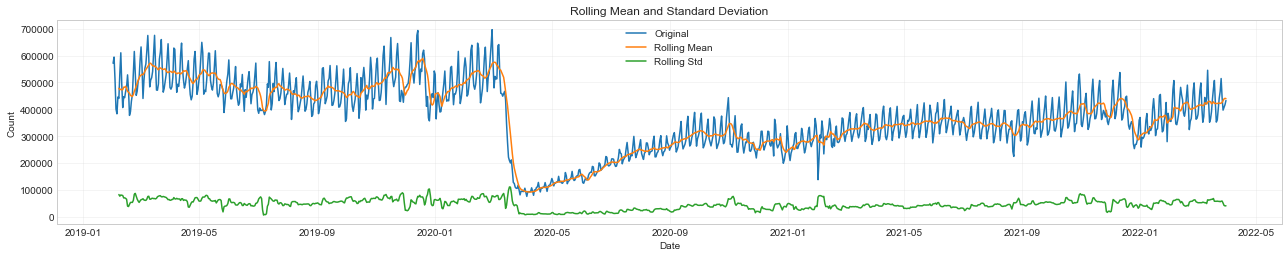

In [6]:
test_stationarity(uber.nyc)

#### Test Autocorrelation
***

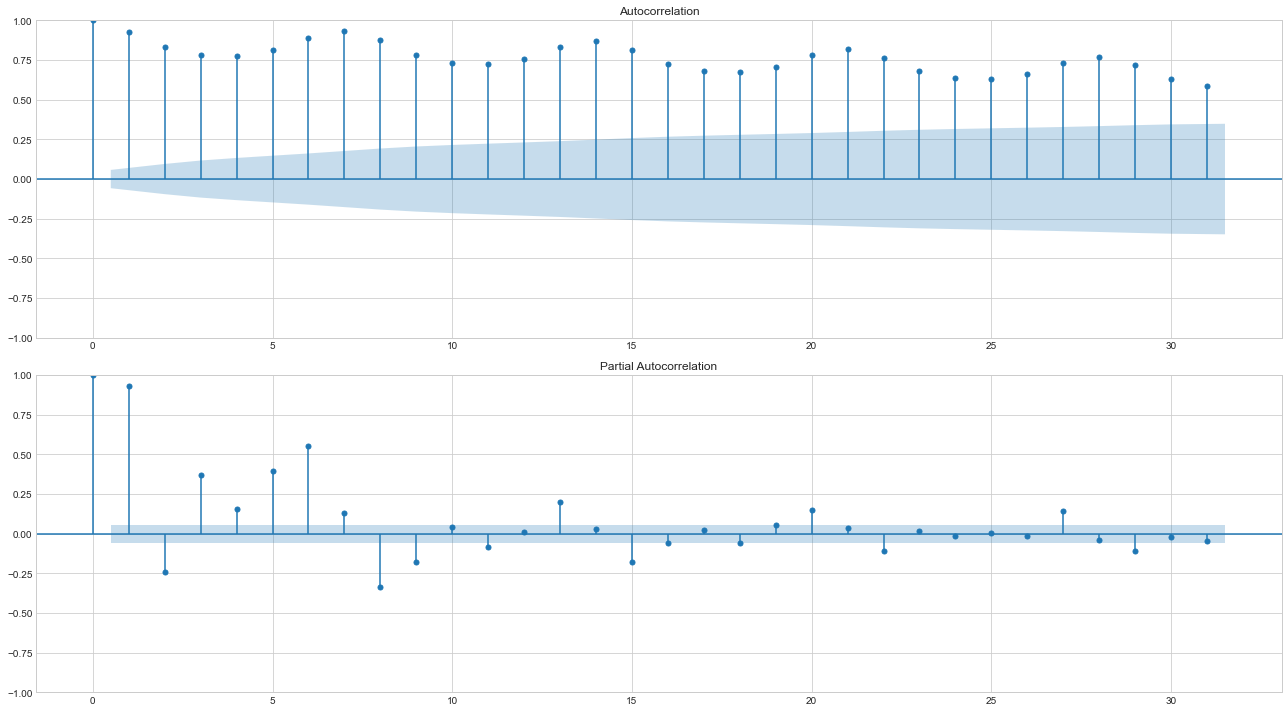

In [7]:
plot_acf_pacf(uber.nyc)

#### Get Decomposition
***

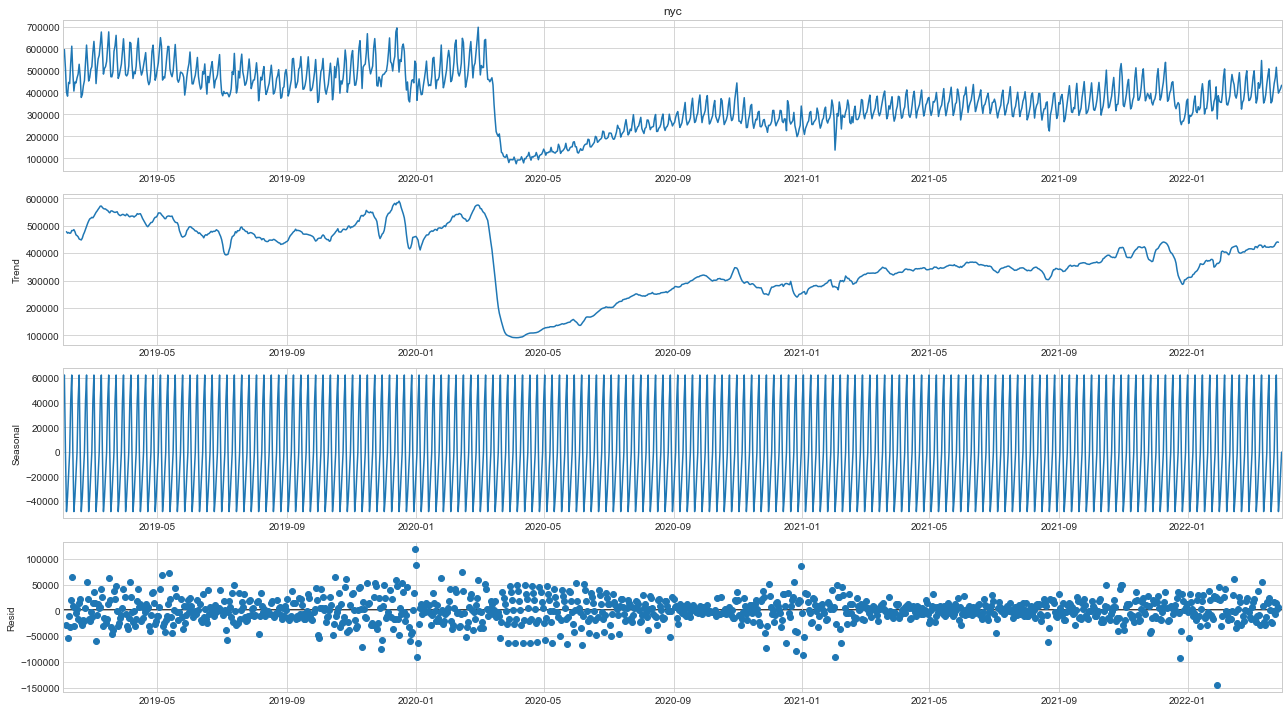

In [8]:
get_decomp(uber.nyc)

### Lyft
***

#### Test Stationarity
***

Null Hypothesis: Data is not stationary

Results of Dickey-Fuller Test:
ADF Statistic                  -2.405337
p-value                         0.140236
Lags Used                      21.000000
Observations Used            1133.000000
Confidence Interval (1%)       -3.436135
Confidence Interval (5%)       -2.864094
Confidence Interval (10%)      -2.568130
dtype: float64

Accept null hypothesis - data is not stationary


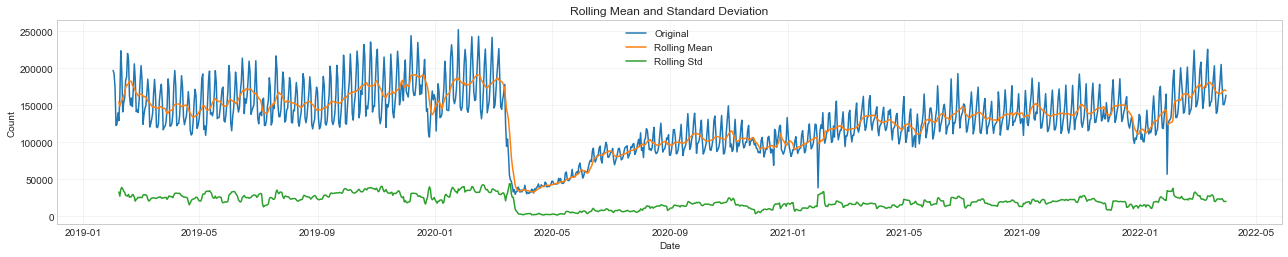

In [9]:
test_stationarity(lyft.nyc)

#### Test Autocorrelation
***

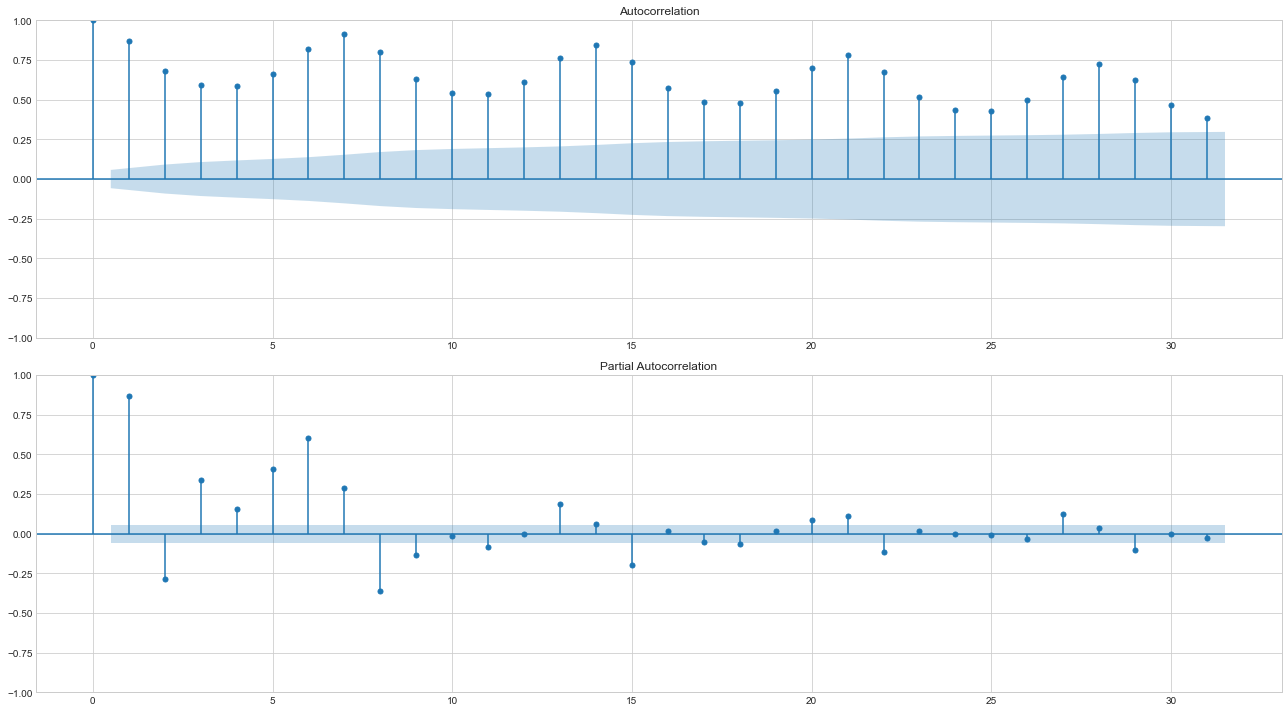

In [10]:
plot_acf_pacf(lyft.nyc)

#### Get Decomposition
***

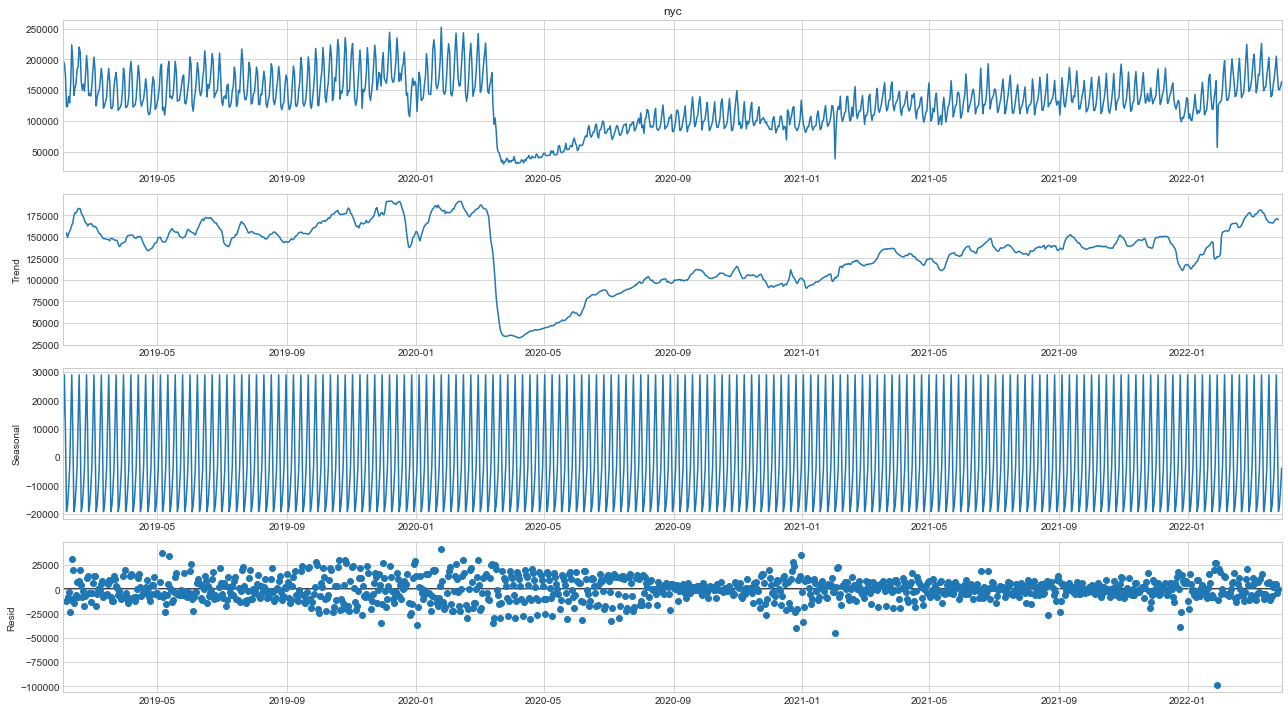

In [11]:
get_decomp(lyft.nyc)

### Weather
***

#### Test Stationarity
***

Null Hypothesis: Data is not stationary

Results of Dickey-Fuller Test:
ADF Statistic                  -1.761918
p-value                         0.399526
Lags Used                      15.000000
Observations Used            1139.000000
Confidence Interval (1%)       -3.436104
Confidence Interval (5%)       -2.864081
Confidence Interval (10%)      -2.568123
dtype: float64

Accept null hypothesis - data is not stationary


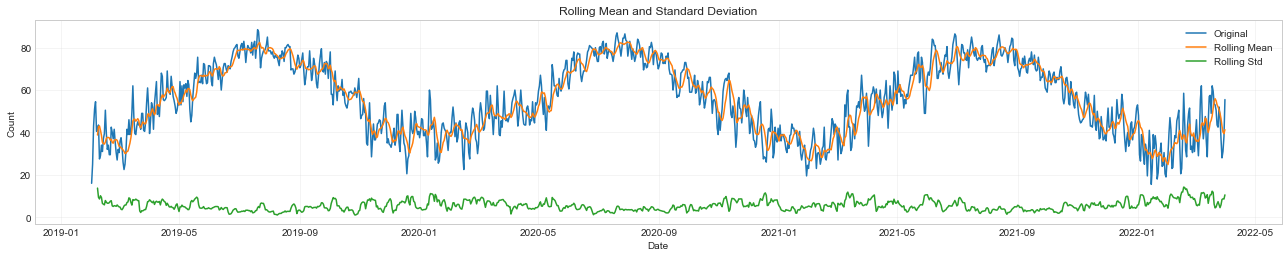

In [12]:
test_stationarity(weather.temp)

#### Test Autocorrelation
***

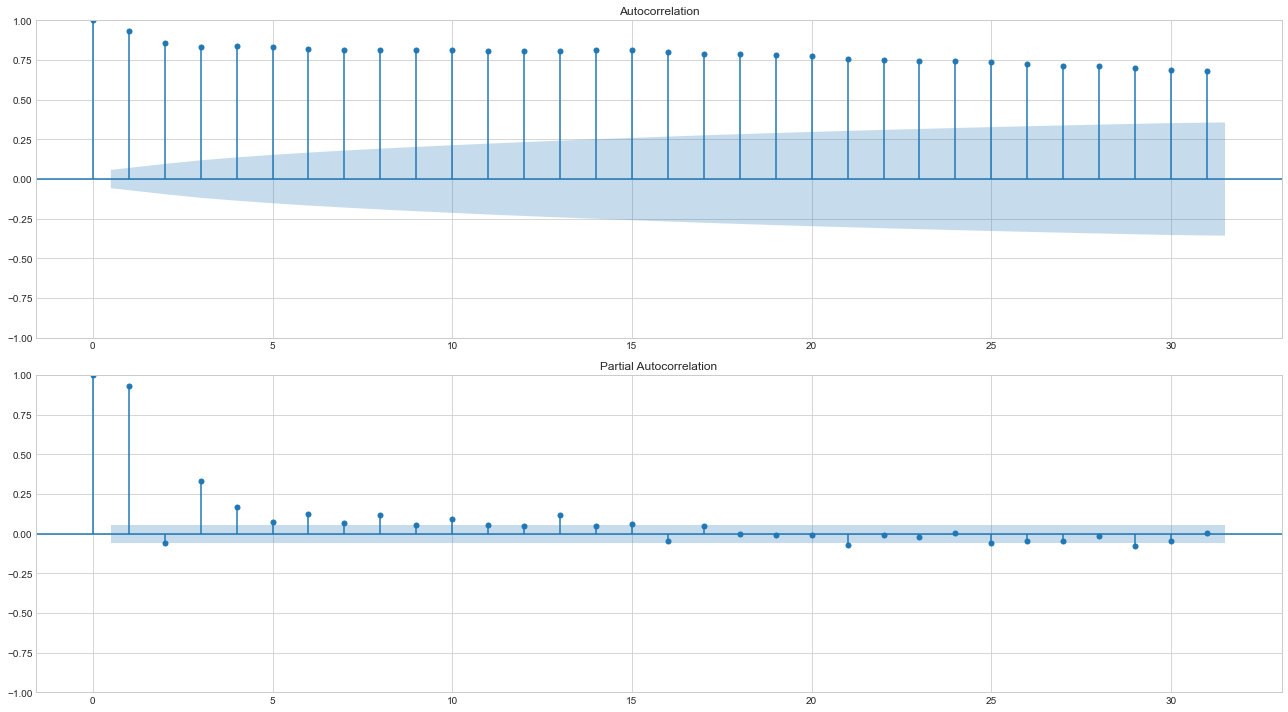

In [13]:
plot_acf_pacf(weather.temp)

#### Get Decomposition
***

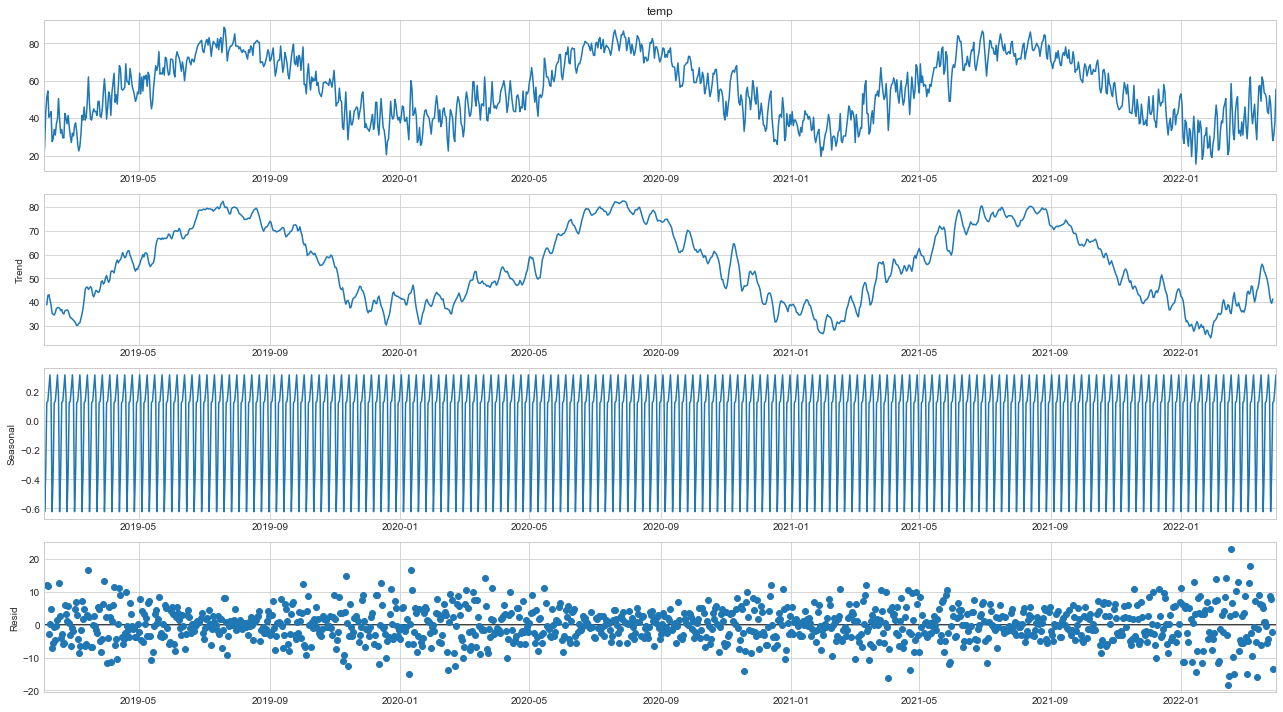

In [14]:
get_decomp(weather.temp)

### Covid
***

#### Test Stationarity
***

Null Hypothesis: Data is not stationary

Results of Dickey-Fuller Test:
ADF Statistic                 -3.440975
p-value                        0.009639
Lags Used                     20.000000
Observations Used            741.000000
Confidence Interval (1%)      -3.439206
Confidence Interval (5%)      -2.865448
Confidence Interval (10%)     -2.568851
dtype: float64

Reject null hypothesis - data is stationary


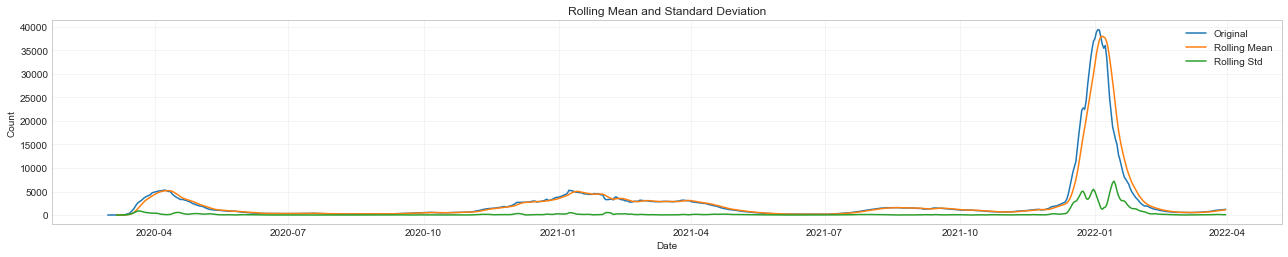

In [15]:
test_stationarity(covid.nyc_case)

#### Test Autocorrelation
***

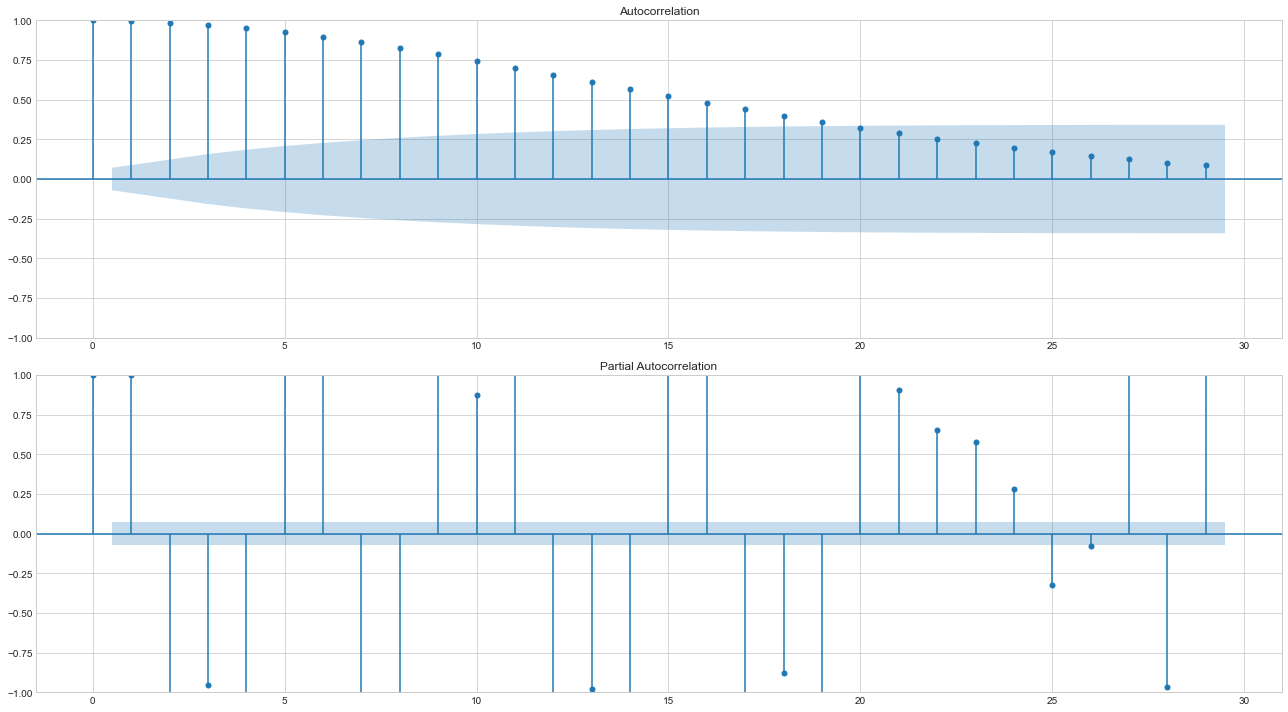

In [16]:
plot_acf_pacf(covid.nyc_case)

#### Get Decomposition
***

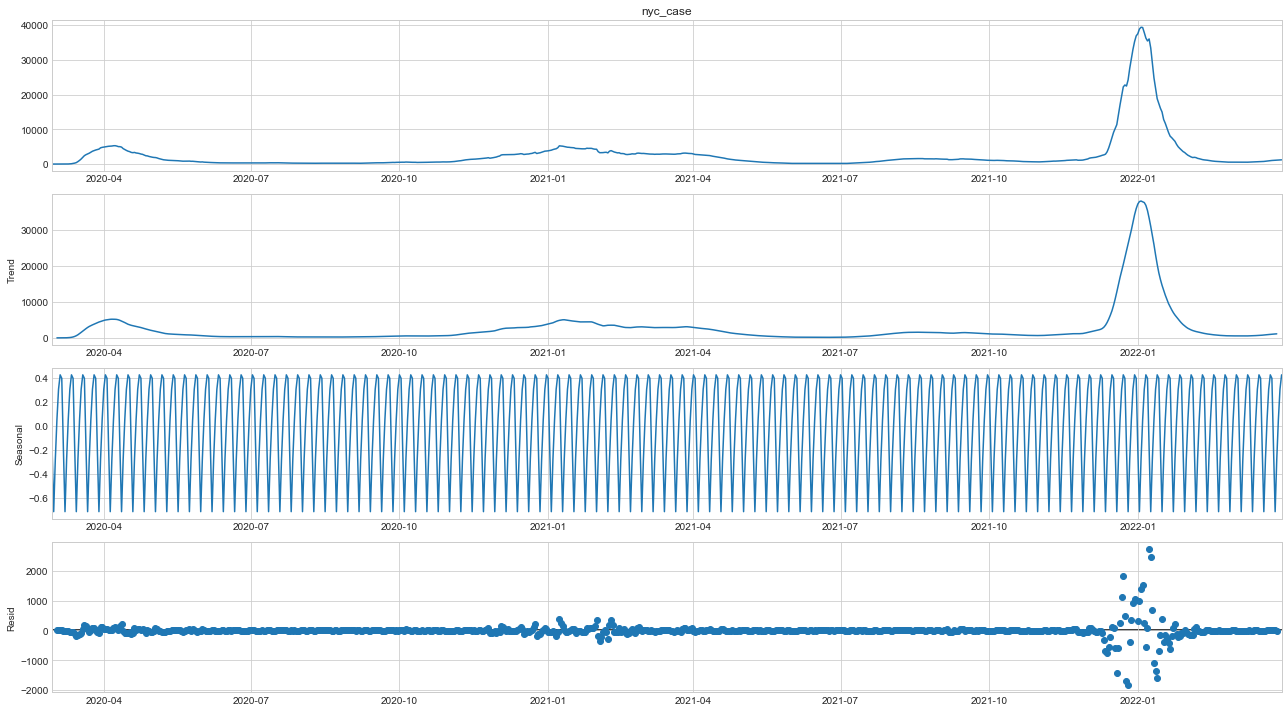

In [17]:
get_decomp(covid.nyc_case)

### Vaccination
***

#### Test Stationarity
***

Null Hypothesis: Data is not stationary

Results of Dickey-Fuller Test:
ADF Statistic                 -3.007734
p-value                        0.034178
Lags Used                     11.000000
Observations Used            338.000000
Confidence Interval (1%)      -3.449846
Confidence Interval (5%)      -2.870129
Confidence Interval (10%)     -2.571346
dtype: float64

Reject null hypothesis - data is stationary


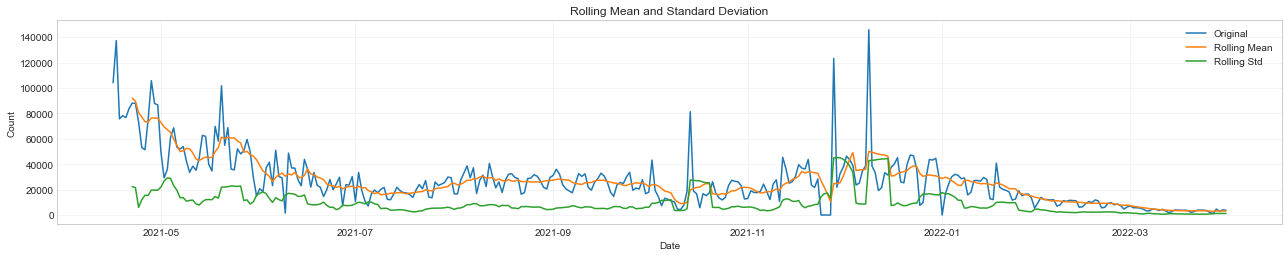

In [18]:
test_stationarity(vax.vaccinated)

#### Test Autocorrelation
***

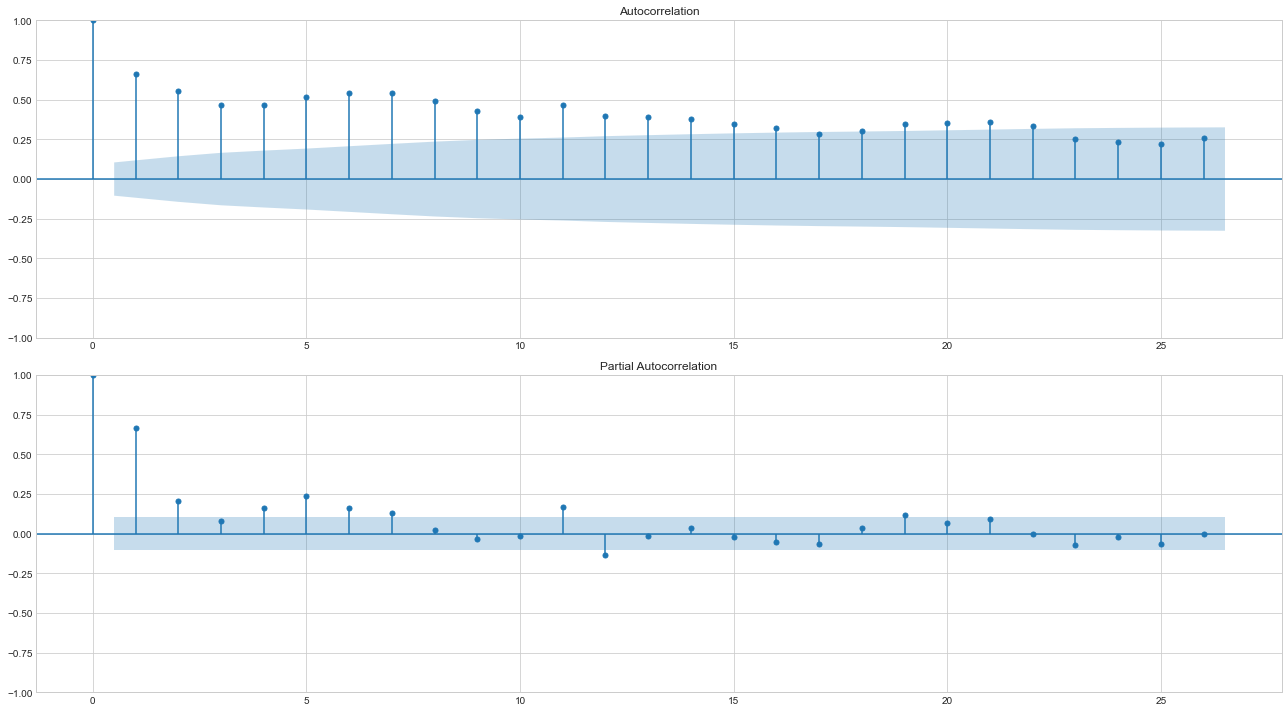

In [19]:
plot_acf_pacf(vax.vaccinated)

#### Get Decomposition
***

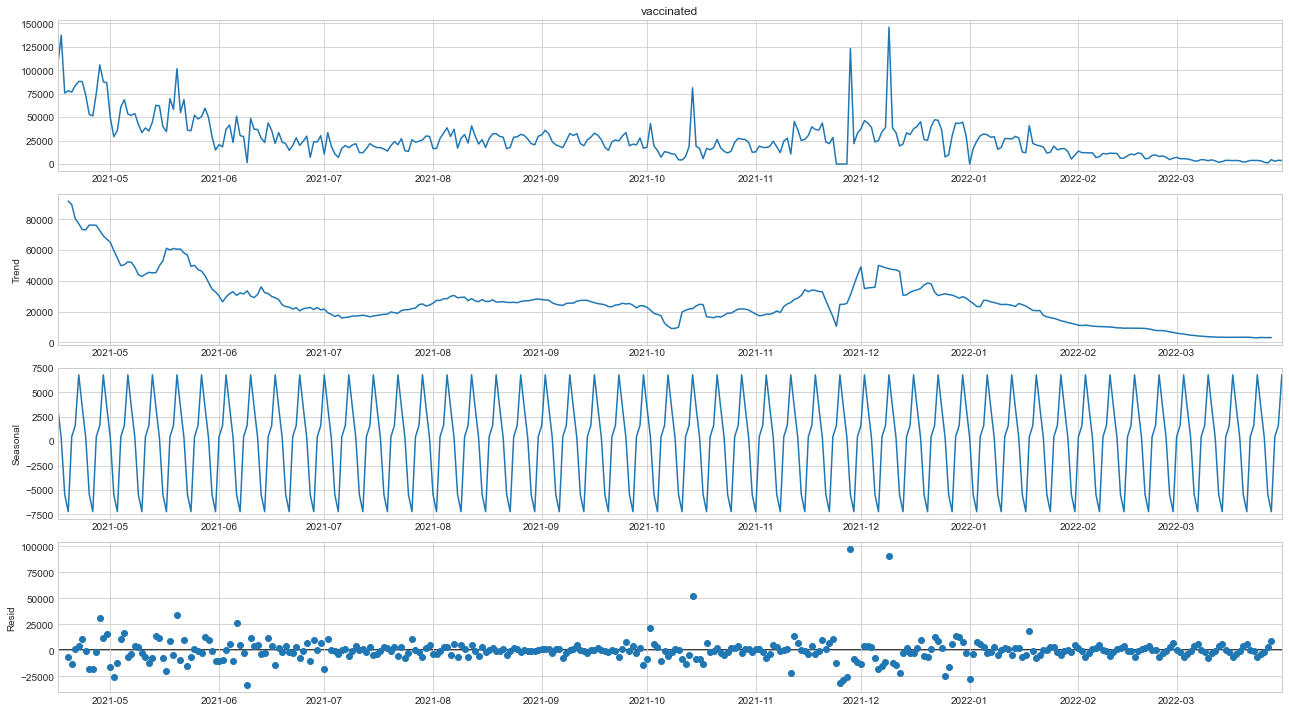

In [20]:
get_decomp(vax.vaccinated)